In [1]:
import fimdp
fimdp.setup()
from fimdp.examples import reachability_examples
from fimdp.energy_solvers import BasicES, BUCHI, POS_REACH, AS_REACH

## Reachability & Büchi example
* It distinghuishes:
1. **Positive reachability** from **Sufficent levels**:
  - state 0: safe=2, pos_reach=5
2. **Almost-sure reachability** from **Positive reachability**
  - state 3: pos_reach=2, alsure_reach=3(via-reaload)/6
3. **Büchi** from **Almost-sure reachability**
  - state 6: alsure_reach=4, Büchi=10

* Some of the good paths go via a reload state.
  - almost-sure reachability+ of 3 goes via 4
  - everything from 5 goes via 4
* Includes little_alsure gadget.
  - states 6, 7, 9, 10

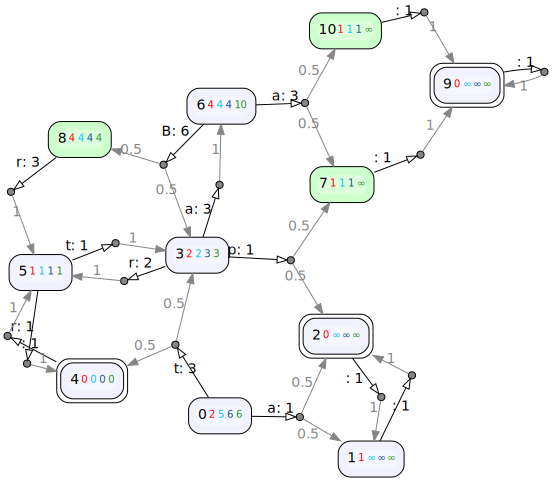

In [2]:
m, T = reachability_examples.ultimate()
solver = BasicES(m, 30, T)
solver.get_min_levels(BUCHI)
solver.get_min_levels(POS_REACH)
solver.get_min_levels(AS_REACH)
solver.show(".<-1")

The numbers indicate minimal values of energy needed in a state for:
 * <font color="orange">minimal initial consumption</font> (until we reach some reload)
 * <font color="red">sufficient levels for survival</font> (as above but does not consider reoads with <font color="orange">∞</font>
 * <font color="deepskyblue">positive reachability</font> (have positive probability to hit the blue states from `s` and always survive (before and after reaching the blue states))
 * <font color="dodgerblue">almost sure reachability</font> (always survive and have probability 1 to reach blue states + survive)
 * <font color="darkblue">just helper values</font> for almost sure reachability
 * <font color="green">Büchi</font> (always survive and have probability 1 of visiting blue states infinitely often)
 * <font color="darkgreen">just helper values</font> for Büchi

We can't use the numbers to compute the minimal capacity easily as you can see in the following, where we decrease the capacity to 14. It is not enough for the Büchi objective (as the cycle  4 - 5 - 3 - 6 - 8 - 5 - 4 needs at least 15 energy).

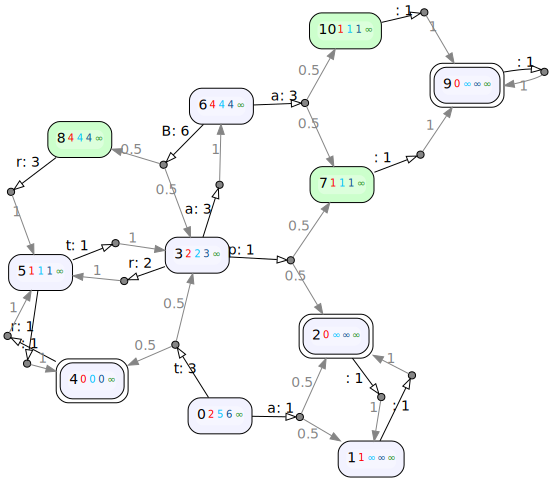

In [3]:
m, T = reachability_examples.ultimate()
solver = BasicES(m, 14, T)
solver.get_min_levels(BUCHI)
solver.get_min_levels(POS_REACH)
solver.get_min_levels(AS_REACH)
solver

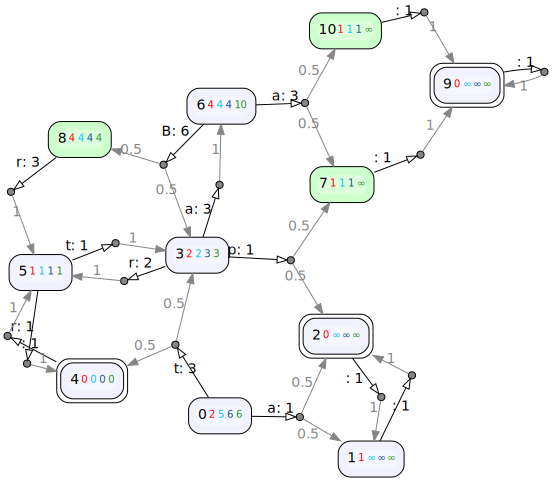

In [4]:
solver = BasicES(m, 16, T)
solver.get_min_levels(BUCHI)
solver.get_min_levels(POS_REACH)
solver.get_min_levels(AS_REACH)
solver

In [5]:
solver.get_selector(BUCHI)

[{16: 0——t[3]——>{3: 0.5, 4: 0.5}, 6: 0——t[3]——>{3: 0.5, 4: 0.5}},
 {},
 {},
 {13: 3——a[3]——>{6: 1}, 3: 3——r[2]——>{5: 1}},
 {0: 4——[1]——>{5: 1}},
 {14: 5——t[1]——>{3: 1}, 1: 5——r[1]——>{4: 1}},
 {10: 6——B[6]——>{3: 0.5, 8: 0.5}},
 {},
 {4: 8——r[3]——>{5: 1}},
 {},
 {}]